# Scalt - Notebook criado para fazer um estudo sobre possíveis transferências no modo carreira e que podem se espelhar na vida real também 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'slategrey', 'salmon', 'olive', 'violet', 'crimnson', 'marron', 'gold']

df = pd.read_csv("planilhas/dados/base_jogadores.csv", sep=";", index_col=0)

C:\Users\l5\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Valor euro 40% > do que a taxa de transferência (overall > 70 & idade < 27)

In [67]:
temp = df.loc[(df.valor_euro > (df.passe_euro - df.passe_euro*0.40)) & (df.emprestimo == False) & (df.idade < 27) & (df.overall > 70)]
temp = temp.sort_values(by="potencial", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head()

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
796,R. Gravenberch,19,78,90,12,33000000,52800000,Ajax
1122,N. Madueke,19,77,88,11,23000000,36800000,PSV
571,Antony,21,79,88,9,39500000,63200000,Ajax
1007,M. Kudus,20,77,86,9,23000000,36800000,Ajax
2553,D. Rensch,18,73,85,12,7000000,11200000,Ajax


In [41]:
temp.to_csv('planilhas/analises/bons_negocios.csv', columns=header, sep=';', encoding='utf-8-sig')

### Clubes para ficar de olho

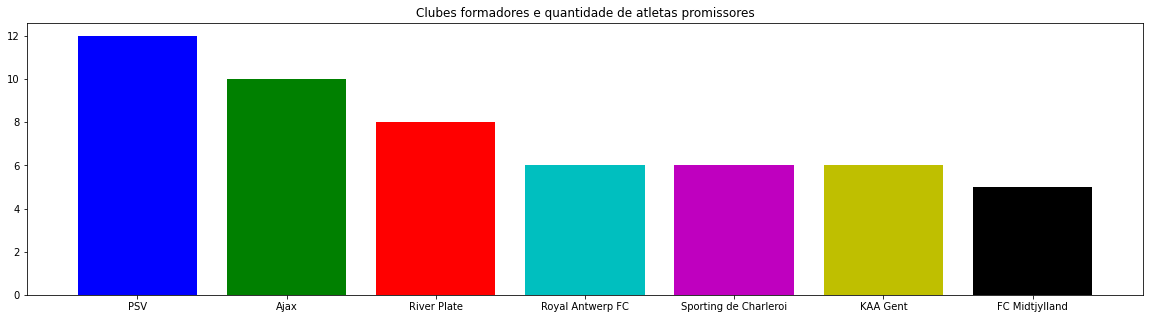

In [69]:
plt.rcParams['figure.figsize'] = [20, 5]
times = temp.clube.value_counts().index.tolist()
quantidade = temp.clube.value_counts().values.tolist()

plt.title('Clubes formadores e quantidade de atletas promissores')
plt.bar(times[:7], quantidade[:7], color=colors[:7])
plt.show()

### Jogadores >= 28 anos que podem render com potencial

In [13]:
temp = df.loc[(df.idade >= 28) & (df.overall >= 40)]
temp = temp.sort_values(by="crescimento", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head()

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
7565,H. Verhulst,28,67,70,3,950000,1500000,AZ Alkmaar
5290,S. McDermott,28,70,73,3,1500000,2000000,Kristiansund BK
16045,I. Al Kaabi,28,59,62,3,0,0,Free agent
10065,D. Petković,28,65,68,3,650000,1300000,Angers SCO
16919,J. Gal,28,58,61,3,190000,252000,Degerfors IF


### Melhores opções Free Agent com taxa de crescimento

In [51]:
temp = df.loc[(df.clube == 'Free agent') & (df.idade < 27) & (df.overall > 70)]
temp = temp.sort_values(by="potencial", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'clube']].head()

,nome,idade,overall,potencial,crescimento,clube
3612,M. Safonov,22,72,82,10,Free agent
4203,S. Szymański,22,71,81,10,Free agent
3281,D. Fomin,24,72,77,5,Free agent
2147,V. Karavaev,26,74,75,1,Free agent


### Melhores opções Free Agent

In [53]:
temp = df.loc[(df.clube == 'Free agent') & (df.overall > 70)]
temp = temp.sort_values(by="potencial", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,clube
195,T. Alderweireld,32,83,83,0,Free agent
3612,M. Safonov,22,72,82,10,Free agent
4203,S. Szymański,22,71,81,10,Free agent
406,G. Krychowiak,31,80,80,0,Free agent
896,M. Ozdoev,28,77,78,1,Free agent
738,A. Dzyuba,32,78,78,0,Free agent
3281,D. Fomin,24,72,77,5,Free agent
1223,V. Claesson,29,76,76,0,Free agent
2733,M. Degenek,27,73,76,3,Free agent
1459,A. Dragović,30,76,76,0,Free agent


### Bons jogadores em fim de contrato (idade > 23) -> Regra dos 6 meses

In [84]:
temp = df.loc[(df.fim_contrato == 2022) & (df.idade >= 23) & (df.idade <= 30)]
temp = temp.sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'salario_euro', 'clube']].head(20)

,nome,idade,overall,potencial,salario_euro,clube
167,F. Chiesa,23,83,91,74000,Juventus
42,P. Dybala,27,87,88,160000,Juventus
170,O. Dembélé,24,83,88,165000,FC Barcelona
41,P. Pogba,28,87,87,220000,Manchester United
211,N. Süle,25,82,87,78000,FC Bayern München
205,P. Gollini,26,82,87,48000,Tottenham Hotspur
204,C. Romero,23,82,87,51000,Tottenham Hotspur
477,D. Zakaria,24,80,86,28000,Borussia Mönchengladbach
1006,L. Suárez,23,77,86,23000,Granada CF
384,L. Pellegrini,25,81,86,61000,Roma


In [87]:
temp = df.loc[(df.emprestimo == False) & (df.idade < 23) & (df.overall > 70) & (df.fim_contrato == 2022)]
temp = temp.sort_values(by="potencial", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'salario_euro', 'clube']].head(20)

,nome,idade,overall,potencial,salario_euro,clube
2,K. Mbappé,22,91,95,230000,Paris Saint-Germain
292,Pedri,18,81,91,51000,FC Barcelona
1292,Ansu Fati,18,76,90,44000,FC Barcelona
2290,G. Raspadori,21,74,88,22000,Sassuolo
1301,A. Hložek,18,76,87,500,Sparta Praha
400,B. Kamara,21,80,86,30000,Olympique de Marseille
2662,Diogo Costa,21,73,85,5000,FC Porto
3541,Fábio Vieira,21,72,85,7000,FC Porto
855,D. Zagadou,22,78,84,42000,Borussia Dortmund
1340,R. Alvarado,22,76,83,48000,Cruz Azul


### Potenciais goleiros de sucesso